In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

(2, 10)

In [3]:
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

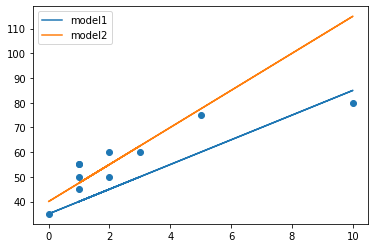

In [4]:
plt.scatter(X[1], y)
plt.plot(X[1], 35 * X[0] + X[1] * 5, label='model1')
plt.plot(X[1], 40 * X[0] + X[1] * 7.5, label='model2')
plt.legend(loc='best')
plt.show()

In [5]:
y_pred1 = np.ones(10) * 35 + X[1] * 5
y_pred2 = np.ones(10) * 40 + X[1] * 7.5
y_pred1, y_pred2

(array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.]),
 array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
         55. ]))

In [6]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0
# Массив Х - транспонированная матрица, чтобы привести к классическому виду необходимо задать вектор признаков и вектор 
#значений в соответствующей размерности


array([46.18622449,  3.96683673])

In [7]:
X1 = X.swapaxes(0, 1)
y1 = y.reshape((len(y), -1))
W1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y1
W1

array([[46.18622449],
       [ 3.96683673]])

In [8]:
# Матрица ковариаций
np.dot(X, X.T)

array([[ 10,  26],
       [ 26, 146]])

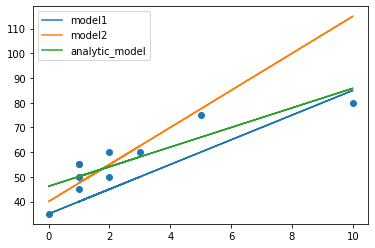

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.legend(loc='best')
plt.show()

In [10]:
y_pred3 = W_0[0] + W_0[1] * X[1]

In [11]:
def mae_count(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err


def mse_count(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [12]:
mae_count(y, y_pred1), mae_count(y, y_pred2), mae_count(y, y_pred3)

(9.5, 7.5, 5.293367346938776)

In [13]:
mse_count(y, y_pred1), mse_count(y, y_pred2), mse_count(y, y_pred3)

(117.5, 143.75, 36.88137755102041)

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [14]:
n = X.shape[1]
eta = 1e-04

W = np.array([1, 0.5])
W, eta

(array([1. , 0.5]), 0.0001)

In [15]:
for i in range(1500):
    y_pred = W @ X
    err = mse_count(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= eta * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [1.01084 0.53362] 3068.75
100 [2.00458337 3.41996768] 2125.8050009221392
200 [2.85080469 5.53323192] 1601.5434338034809
300 [3.5868097  7.07517233] 1306.2993437054397
400 [4.24019033 8.19494663] 1136.4056263368866
500 [4.83135694 9.00282425] 1035.198566745004
600 [5.37541054 9.58032468] 971.7045781281251
700 [5.88352678 9.98771274] 928.9912787532905
800 [ 6.36397922 10.26953984] 897.8006848214567
900 [ 6.8228958 10.4587405] 873.0693831461674
1000 [ 7.26481809 10.57966102] 852.0266041657253
1100 [ 7.69311475 10.65029842] 833.1547081559577
1200 [ 8.11028719 10.6839558 ] 815.6210298256476
1300 [ 8.51819558 10.69046606] 798.967347372947
1400 [ 8.91822587 10.67709665] 782.9401581366196


In [16]:
def grad_count(X, y, eta=1e-04, verbose=False, tol=0.0):
    n = X.shape[1]
    W = np.array([1, 0.5])  #стартовое значение весов
    min_err = float('inf')  #стартовое значение ошибки модели (бесконечность)
    n_iter = 0  #стартовое количество итераций
    stop_chek = True  #отслеживаем снижение ошибки
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = mse_count(y, y_pred)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= eta * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [17]:
W_1, mse_1 = grad_count(X, y, eta=0.01, verbose=True)
W_1, mse_1

100 [31.03972082  6.7637545 ] 162.8252170124765
200 [40.86051457  4.95026981] 52.45204238049958
300 [44.31363483  4.31262474] 38.80640702660798
400 [45.52779733  4.08842035] 37.11937242936791
500 [45.95471284  4.00958713] 36.91080128859843
600 [46.10482195  3.98186834] 36.8850152609538
700 [46.15760229  3.97212204] 36.88182728768369
800 [46.17616055  3.96869512] 36.88143315277811
900 [46.18268587  3.96749017] 36.88138442516635
1000 [46.18498027  3.96706649] 36.881378400883506
1100 [46.185787    3.96691752] 36.881377656090535
1200 [46.18607066  3.96686514] 36.881377564010414
1300 [46.1861704   3.96684672] 36.88137755262638
1400 [46.18620547  3.96684025] 36.88137755121896
1500 [46.1862178   3.96683797] 36.881377551044956
1600 [46.18622214  3.96683717] 36.88137755102344
Stop descent! iteration: 1643, weights: [46.18622297  3.96683701], mse: 36.88137755102165


(array([46.18622299,  3.96683701]), 36.88137755102165)

In [18]:
W_1, mse_1 = grad_count(X, y, eta=0.03, verbose=True)
W_1, mse_1

100 [44.37506848  4.30128055] 38.76030924501067
200 [46.11007545  3.98089824] 36.88469900433347
300 [46.18302285  3.96742794] 36.88138342246968
400 [46.18608988  3.96686159] 36.88137756139956
500 [46.18621883  3.96683778] 36.88137755103877
Stop descent! iteration: 570, weights: [46.18622385  3.96683685], mse: 36.88137755102063


(array([46.18622387,  3.96683685]), 36.88137755102063)

In [19]:
W_1, mse_1 = grad_count(X, y, eta=0.07, verbose=True)
W_1, mse_1

Stop descent! iteration: 2, weights: [ 8.588 24.034], mse: 3068.75


(array([ 6.547304, -3.297528]), 3068.75)

In [20]:
W_1, mse_1 = grad_count(X, y, eta=0.06, verbose=True)
W_1, mse_1

100 [46.11757806  3.97951282] 36.88425933835636
200 [46.1861151   3.96685693] 36.881377558338606
Stop descent! iteration: 287, weights: [46.18622406  3.96683681], mse: 36.881377551020506


(array([46.18622409,  3.96683681]), 36.881377551020506)

**Можно сделать вывод, то при eta = 0,06 мы максимально приблизились к минимуму за 287 итераций.**

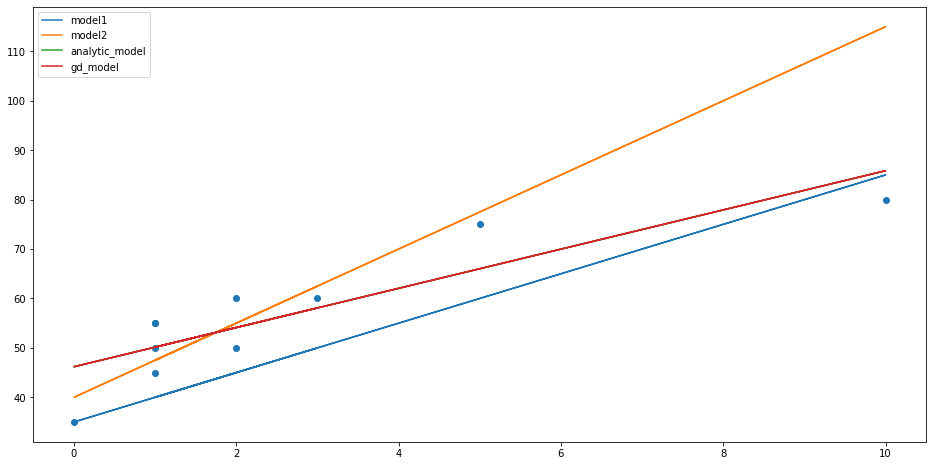

In [21]:
plt.figure(figsize=(16, 8))
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.plot(X[1], W_1[0] + W_1[1] * X[1], label='gd_model')
plt.legend(loc='best')
plt.show()

Линии регрессии, построенные на основании аналитического метода и градиентного спуска перекрывают друг друга